In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Data

In [63]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/heart_classification_data.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We cannot call this code as there is no object64 in the dataset

code = df.describe(exclude=np.number).T

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
# Showing float columns
df.select_dtypes('float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oldpeak  303 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [8]:
# Showing float columns
df.select_dtypes('int64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   slp       303 non-null    int64
 10  caa       303 non-null    int64
 11  thall     303 non-null    int64
 12  output    303 non-null    int64
dtypes: int64(13)
memory usage: 30.9 KB


Before EDA I'll chance the column names 

In [82]:
df.rename(columns={"cp": "chest_pain",
                   "trtbps":"blood_pressure",
                   "chol":"cholestoral",
                   "fbs":"fasting_blood_sugar",
                   "thalachh":"max_heart_rate",
                   "exng":"angina",
                   "slp":"slope",
                   "caa": "n_vessels",
                   "output":"heart_attack"},inplace=True)

In [29]:
df.head()

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,Slope,n_vessels,thall,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [30]:
df.groupby('heart_attack').agg(['mean', 'median'])

age              sex        chest_pain         \
                   mean median      mean median       mean median   
heart_attack                                                        
0             56.601449   58.0  0.826087    1.0   0.478261    0.0   
1             52.496970   52.0  0.563636    1.0   1.375758    2.0   

             blood_pressure        cholestoral         ...    angina         \
                       mean median        mean median  ...      mean median   
heart_attack                                           ...                    
0                134.398551  130.0  251.086957  249.0  ...  0.550725    1.0   
1                129.303030  130.0  242.230303  234.0  ...  0.139394    0.0   

               oldpeak            Slope        n_vessels            thall  \
                  mean median      mean median      mean median      mean   
heart_attack                                                                
0             1.585507    1.4  1.166667    1.0  1.166667    1.0  2.543478   
1             0.583030    0.2  1.593939    2.0  0.363636    0.0  2.121212   

                     
             median  
heart_attack         
0               3.0  
1               2.0  

[2 rows x 26 columns]

In [31]:
# Standard deviation
df.groupby('heart_attack').std()

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,Slope,n_vessels,thall
heart_attack,,,,,,,,,,,,,
0,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762
1,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752


## Box Plot

<AxesSubplot: xlabel='heart_attack', ylabel='oldpeak'>

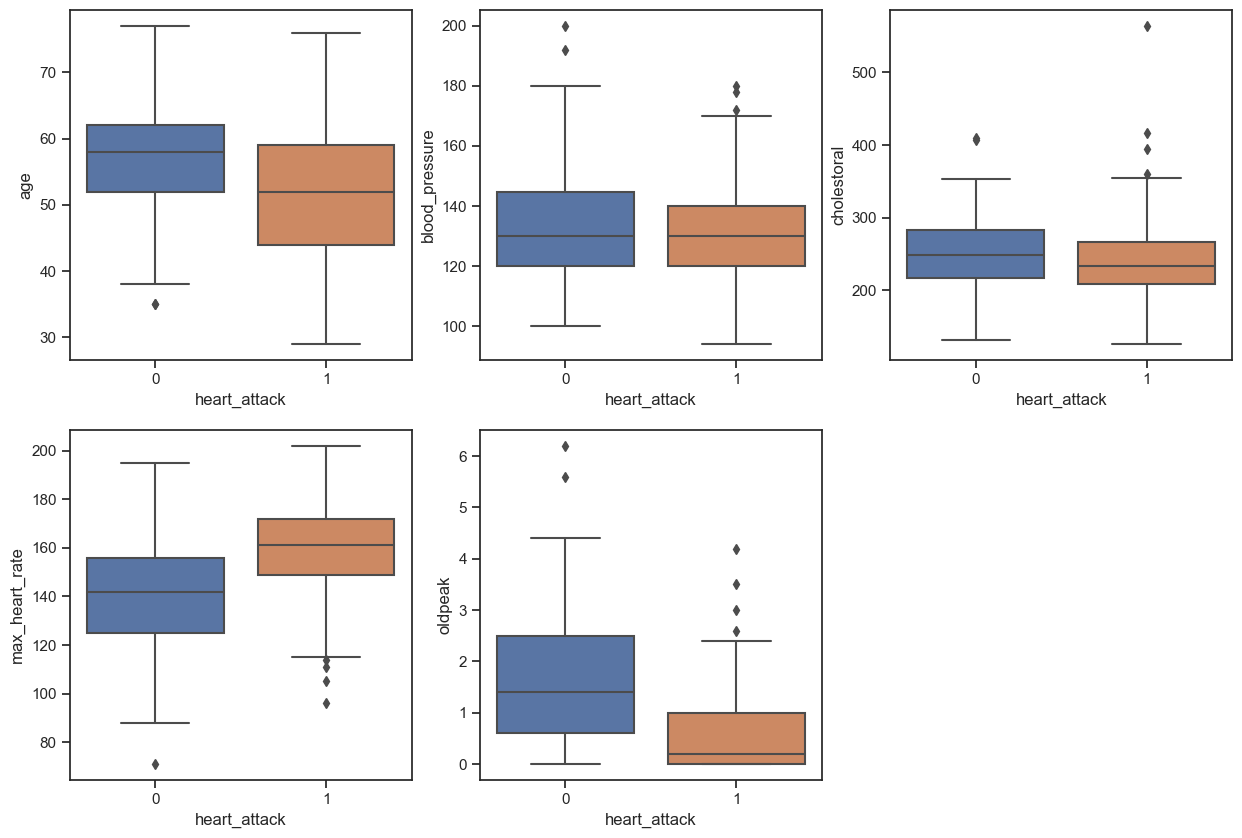

In [32]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='heart_attack', y='age', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='heart_attack', y='blood_pressure', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='heart_attack', y='cholestoral', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='heart_attack', y='max_heart_rate', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='heart_attack', y='oldpeak', data=df)

##### There are too many outliers in the dataset.

## Violin Plot

<AxesSubplot: xlabel='heart_attack', ylabel='oldpeak'>

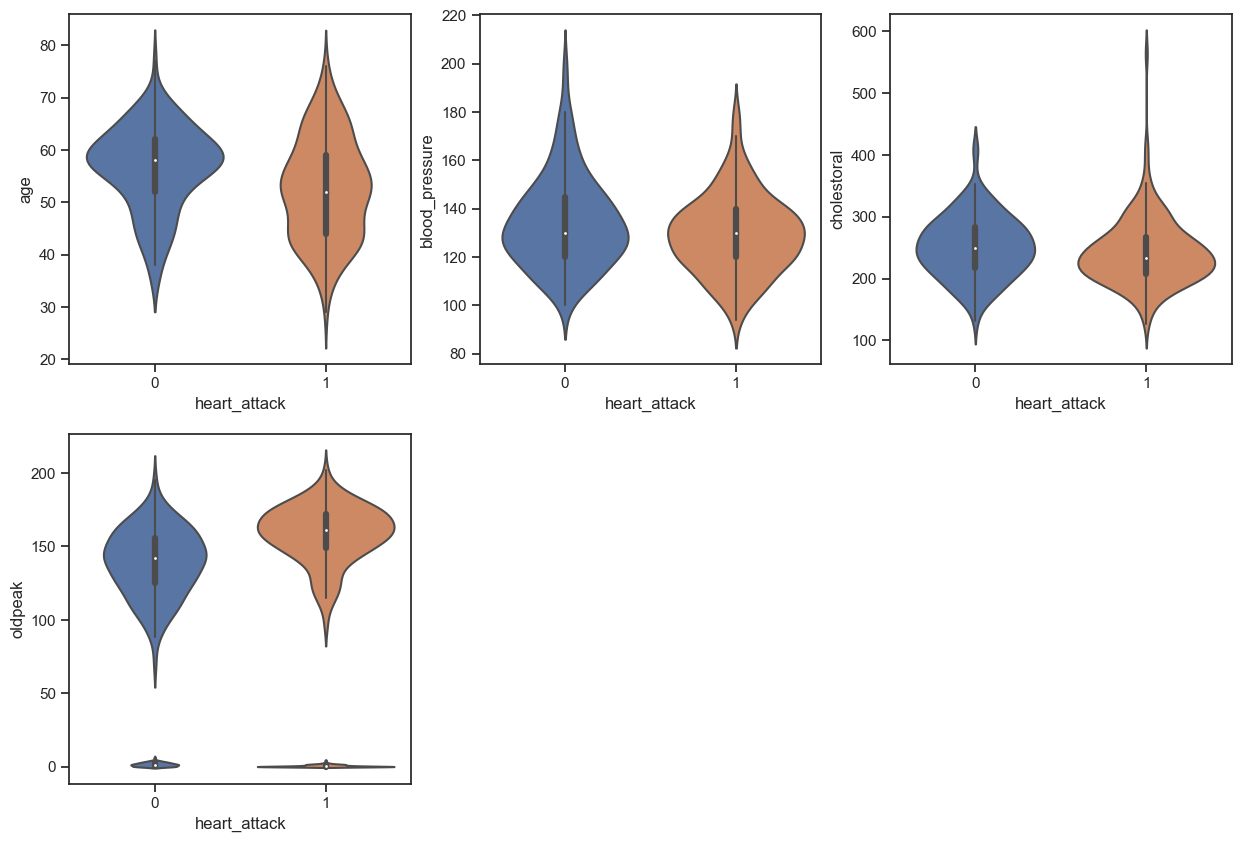

In [33]:
sns.set(style='ticks')
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.violinplot(x='heart_attack', y='age', data=df)
plt.subplot(2,3,2)
sns.violinplot(x='heart_attack', y='blood_pressure', data=df)
plt.subplot(2,3,3)
sns.violinplot(x='heart_attack', y='cholestoral', data=df)
plt.subplot(2,3,4)
sns.violinplot(x='heart_attack', y='max_heart_rate', data=df)
plt.subplot(2,3,4)
sns.violinplot(x='heart_attack', y='oldpeak', data=df)

In [34]:
df.describe()

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,Slope,n_vessels,thall,heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


[]

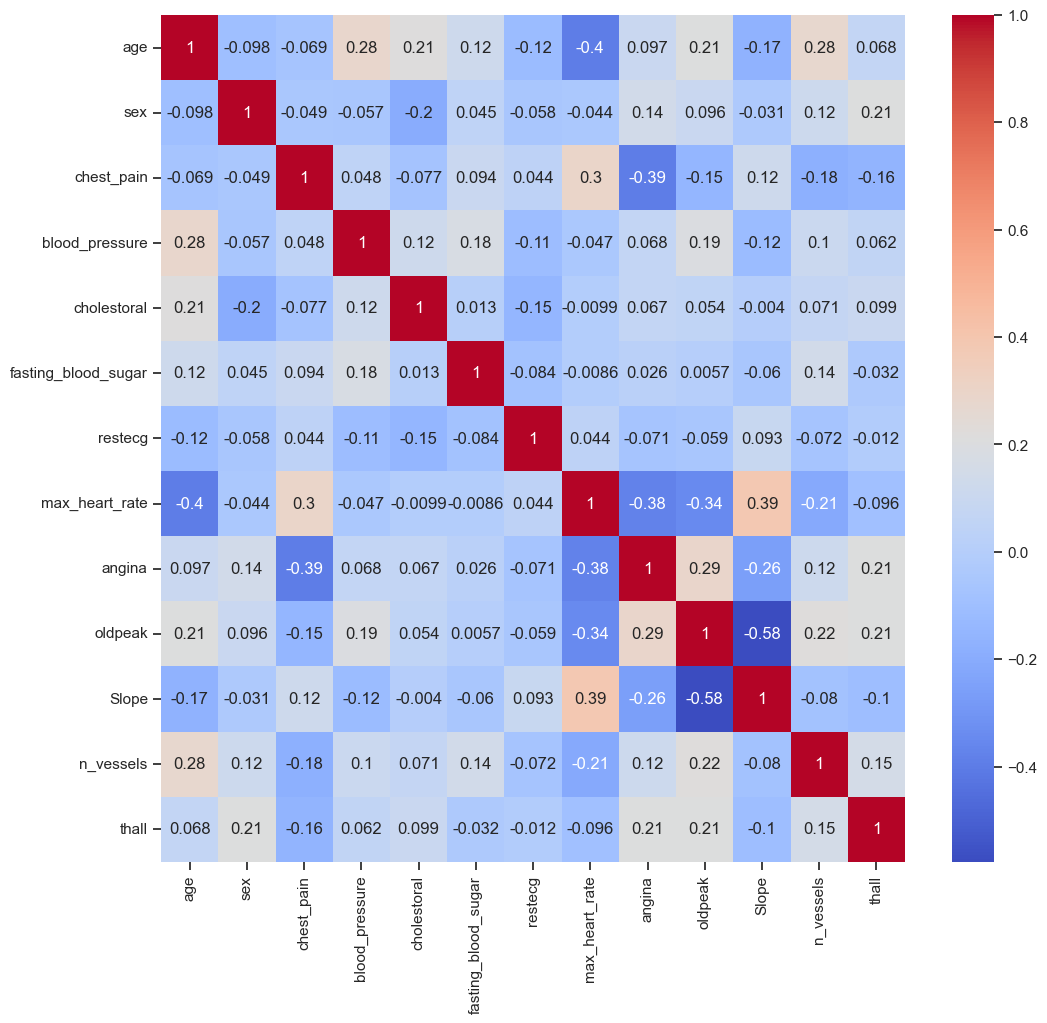

In [35]:
df_without_output = df.drop(['heart_attack'], axis=1)
plt.figure(figsize=(12,11))
sns.heatmap(df_without_output.corr(), annot=True, cmap='coolwarm')
plt.plot()

These two have the highest compatibility score, but I don't like the resulting graphic.(0.39)

<AxesSubplot: title={'center': 'Slope and Max_heart_rate'}, xlabel='Slope', ylabel='max_heart_rate'>

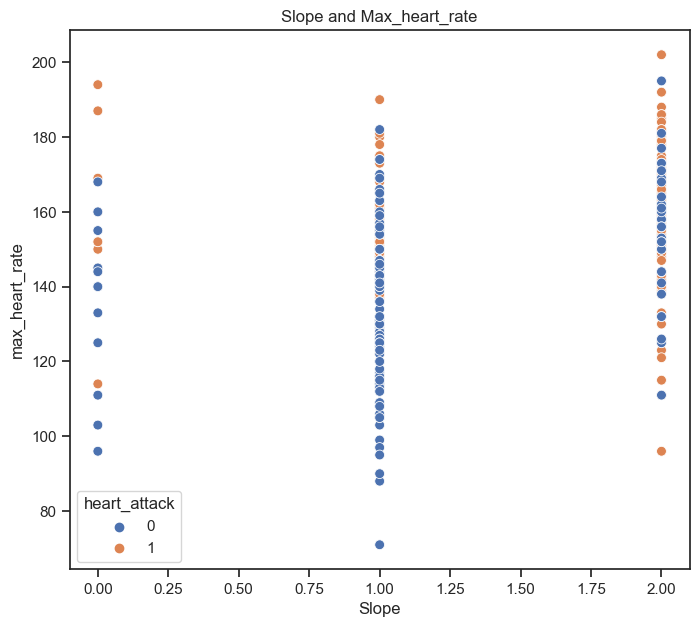

In [41]:
plt.figure(figsize=(8,7))
plt.title('Slope and Max_heart_rate')
sns.scatterplot(data=df,x='Slope',y='max_heart_rate',hue='heart_attack',s=50)

<AxesSubplot: title={'center': 'Slope and Max_heart_rate'}, xlabel='age', ylabel='blood_pressure'>

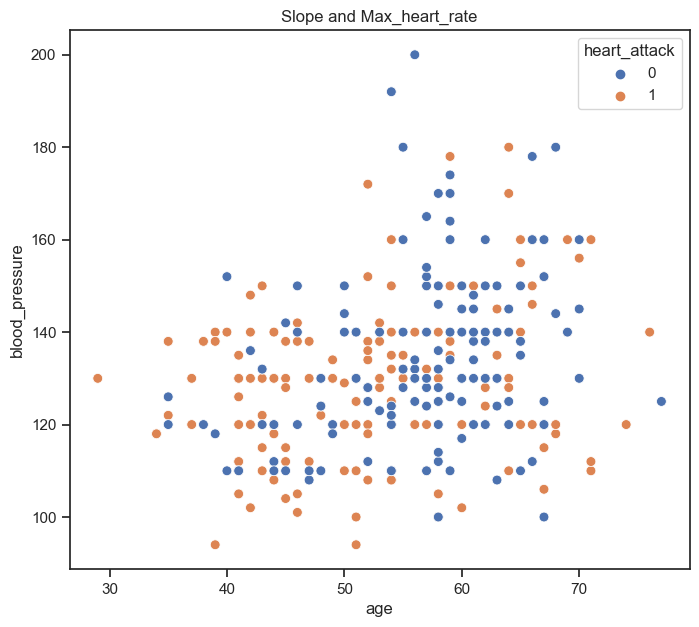

In [44]:
plt.figure(figsize=(8,7))
plt.title('Slope and Max_heart_rate')
sns.scatterplot(data=df,x='age',y='blood_pressure',hue='heart_attack',s=50)

In [73]:
# Chance the sex column, 0 is Female, 1 is Male
df_cpy = df.copy()
df_cpy['sex'].replace({0:'Female', 1:'Male'}, inplace=True)

Count plot of categorical features

In [83]:
df.head()

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slope,n_vessels,thall,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 0, '')

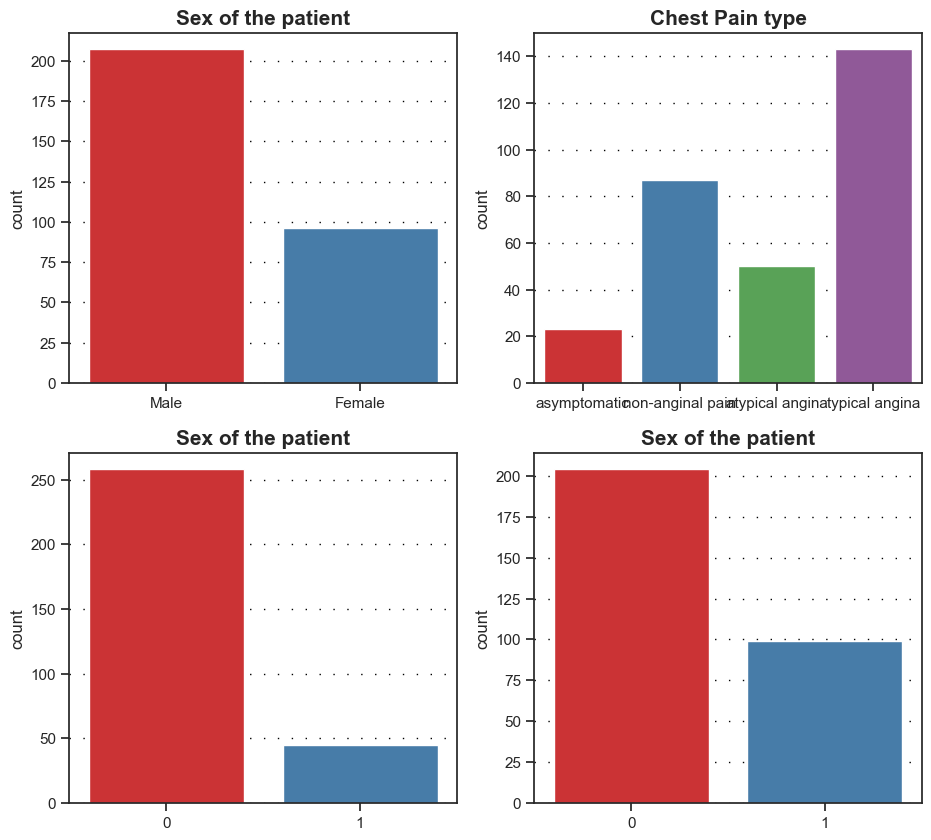

In [111]:
fig = plt.figure(figsize=(11,10))
gs  = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])#sex
ax2 = fig.add_subplot(gs[0,1])#chest_pain
ax3 = fig.add_subplot(gs[1,0])#fasting_blood_sugar
ax4 = fig.add_subplot(gs[1,1])#angina



# Sex 
ax1.set_title('Sex of the patient',fontweight ="bold",fontsize=15)
ax1.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax1,data=df_cpy,x='sex',palette = 'Set1')
ax1.set_xlabel("")

# chest pain
leges = {0: 'typical angina',1: 'atypical angina',2: 'non-anginal pain',3: 'asymptomatic'}
ax2.set_title('Chest Pain type',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax2,data=df.assign(chest_pain = df['chest_pain'].replace(leges)),x='chest_pain',palette = 'Set1')
ax2.set_xlabel("")

# fasting_blood_sugar 
ax3.set_title('Sex of the patient',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax3,data=df,x='fasting_blood_sugar',palette = 'Set1')
ax3.set_xlabel("")

# angina 
ax4.set_title('Sex of the patient',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax4,data=df,x='angina',palette = 'Set1')
ax4.set_xlabel("")